# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\ikinf\anaconda3\envs\pyviz\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
print(type(map_box_api))

<class 'str'>


## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head(10)

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   
2001                Bathurst Manor                   2405   
2001           Bay Street Corridor                     10   
2001               Bayview Village                   2170   
2001         Bayview Woods-Steeles                   1650   
2001          Bedford Park-Nortown                   4985   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   
2001                         1550                 0                  130   
2001                         7575                 0                    0   
2001                          630                 0                  170   
2001                         1715                 0                  925   
2001                         2080                 0                   45   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   
2001        130     375                          745            0   
2001         15       0                          240            0   
2001        765      15                          640            0   
2001        105      10                          170            5   
2001         40     210                         1235           15   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163  
2001               304749                  843                  1052  
2001               257404                 1218                  1142  
2001               327644                 1197                  1164  
2001               343535                 1212                  1018  
2001               565304                  933                  1491

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_type = (to_data[["single_detached_house","apartment_five_storeys_plus","movable_dwelling",
                           "semi_detached_house","row_house","duplex",
                           "apartment_five_storeys_less","other_house"]].groupby(to_data.index).sum())
                                
dwelling_type.head()


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [5]:
# Save the dataframe as a csv file
dwelling_type.to_csv("dwelling_type.csv")

In [6]:
# Helper create_bar_chart function

#def create_bar_chart(data,title, xlabel, ylabel, color):
#    """
# Create a barplot based in the data argument.
#    """"""

Text(0, 0.5, 'Dwelling Type Units')

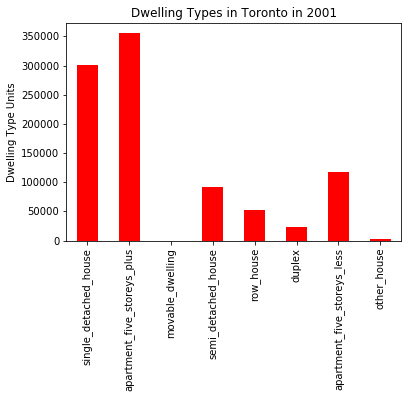

In [7]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
 
barchart_2001 = dwelling_type.loc[2001]
ax=barchart_2001.plot.bar(title = "Dwelling Types in Toronto in 2001", color="red")
ax.set_ylabel("Dwelling Type Units")


Text(0, 0.5, 'Dwelling Type Units')

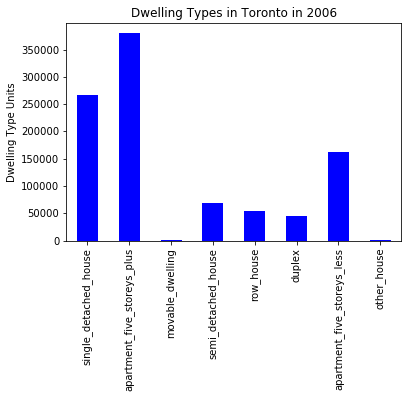

In [8]:

# Bar chart for 2006
 
barchart_2006 = dwelling_type.loc[2006]
ax1=barchart_2006.plot.bar(title = "Dwelling Types in Toronto in 2006", color="blue")
ax1.set_ylabel("Dwelling Type Units")



Text(0, 0.5, 'Dwelling Type Units')

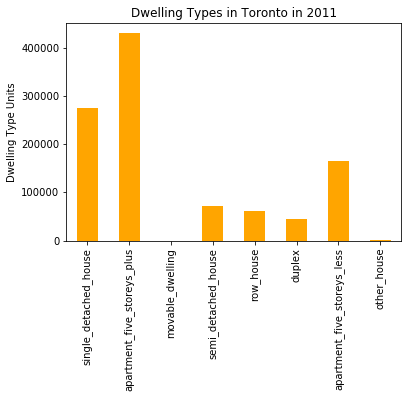

In [9]:
# Bar chart for 2011
 
barchart_2011 = dwelling_type.loc[2011]
ax2=barchart_2011.plot.bar(title = "Dwelling Types in Toronto in 2011", color="orange")
ax2.set_ylabel("Dwelling Type Units")



Text(0, 0.5, 'Dwelling Type Units')

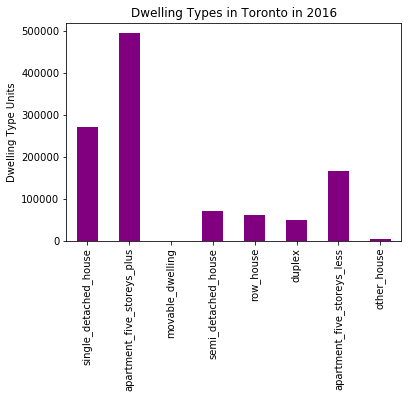

In [10]:
# Bar chart for 2016
 
barchart_2016 = dwelling_type.loc[2016]
ax3=barchart_2016.plot.bar(title = "Dwelling Types in Toronto in 2016", color="purple")
ax3.set_ylabel("Dwelling Type Units")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_shelter_cost = round(to_data[["shelter_costs_owned","shelter_costs_rented"]].groupby(to_data.index).mean(),2)
                                
avg_shelter_cost.head()


shelter_costs_owned  shelter_costs_rented
year                                           
2001               846.88               1085.94
2006              1316.80                925.41
2011              1448.21               1019.79
2016              1761.31               1256.32

In [12]:
# Helper create_line_chart function
#def create_line_chart(data, title, xlabel, ylabel, color):
#    """
#    Create a line chart based in the data argument.
#   """

Text(0, 0.5, 'Average Monthly Shelter Costs')

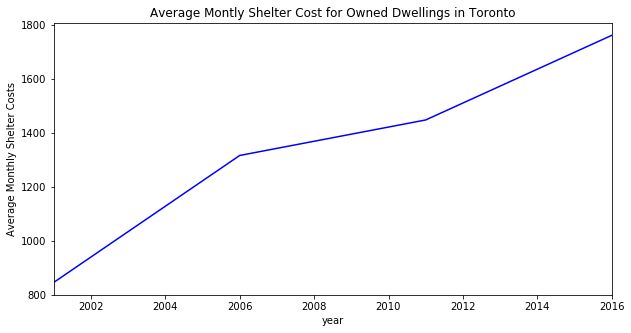

In [13]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
avg_shelter_owned = avg_shelter_cost["shelter_costs_owned"]
ax = avg_shelter_owned.plot(color="blue", figsize=(10,5), title="Average Montly Shelter Cost for Owned Dwellings in Toronto")
ax.set_ylabel("Average Monthly Shelter Costs")




Text(0, 0.5, 'Average Monthly Shelter Costs')

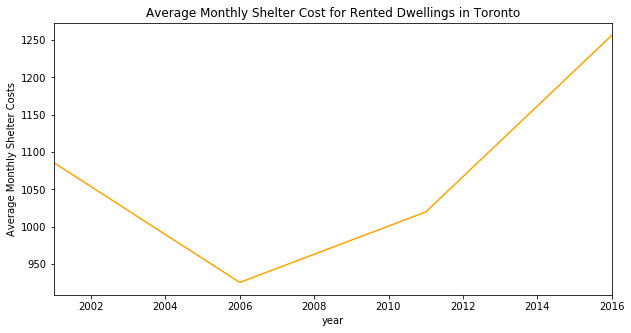

In [14]:
# Line chart for rented dwellings
avg_shelter_rented = avg_shelter_cost["shelter_costs_rented"]
ax = avg_shelter_rented.plot(color="orange", figsize=(10,5), title="Average Monthly Shelter Cost for Rented Dwellings in Toronto")
ax.set_ylabel("Average Monthly Shelter Costs")



## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [15]:
# Calculate the average house value per year
average_house_value = round(to_data[["average_house_value"]].groupby(to_data.index).mean(),2)
                                
average_house_value.head()


average_house_value
year                     
2001            289882.89
2006            424059.66
2011            530424.72
2016            664068.33

Text(0, 0.5, 'Average House Value')

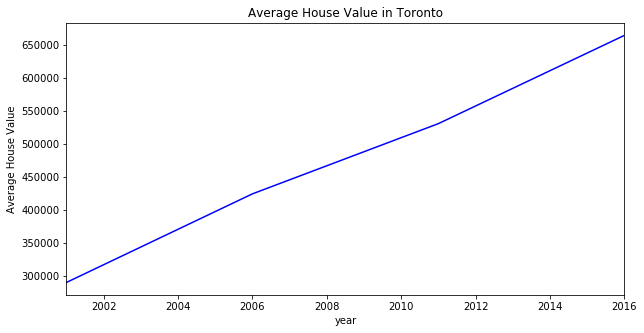

In [16]:
# Plot the average house value per year as a line chart
ax = average_house_value.plot(color="blue", figsize=(10,5), title="Average House Value in Toronto", legend=False)
ax.set_ylabel("Average House Value")



- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [17]:
# Create a new DataFrame with the mean house values by neighbourhood per year
#ngbhood_data = to_data[["neighbourhood"]].groupby([to_data.index])
ngbhood_house_value = to_data.filter(["neighbourhood","average_house_value"], axis=1)



In [18]:

ngbhood_house_value.head()

neighbourhood  average_house_value
year                                                   
2001               Agincourt North               200388
2001  Agincourt South-Malvern West               203047
2001                     Alderwood               259998
2001                         Annex               453850
2001             Banbury-Don Mills               371864

In [19]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
ngbhood_house_value.hvplot.line(title="Average House Value per year by each neighbourhood", groupby="neighbourhood", ylabel="Average House Value", height = 500)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [20]:
# Fetch the data of all dwelling types per year
dwelling_type_ngbhood = to_data.filter(["neighbourhood","single_detached_house","apartment_five_storeys_plus","movable_dwelling",
                           "semi_detached_house","row_house","duplex",
                           "apartment_five_storeys_less","other_house"], axis=1)
                                

dwelling_type_ngbhood.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0

In [21]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

dwelling_type_ngbhood.hvplot.bar(title="Number of dwelling types per year by each neighbourhood", groupby="neighbourhood", ylabel="Number of dwelling types", xlabel ="Year", rot=90, height=500)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [22]:
# Getting the data from the top 10 expensive neighbourhoods
avg_value_ngbhood = (to_data[["average_house_value"]].groupby(to_data["neighbourhood"]).mean())
avg_value_ngbhood = avg_value_ngbhood.sort_values(by="average_house_value", ascending=False)
top_10_ngbhood = avg_value_ngbhood.head(10)
top_10_ngbhood

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00
Casa Loma                                    981064.25
Bedford Park-Nortown                         930415.25
Forest Hill North                            851680.50
Kingsway South                               843234.25
Yonge-St.Clair                               813220.25

In [23]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_ngbhood.hvplot.bar(title="Top 10 Most Expensive Neighbourhoods in Toronto",ylabel="Average House Value", rot=90, height = 500)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [24]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [25]:
# Calculate the mean values for each neighborhood
avg_value_ngbhood = (to_data[["average_house_value"]].groupby(to_data["neighbourhood"]).mean())
avg_value_ngbhood = avg_value_ngbhood.reset_index()


avg_value_ngbhood = avg_value_ngbhood.drop (columns = "neighbourhood")
avg_value_ngbhood.head()

average_house_value
0             329811.5
1             334189.0
2             427922.5
3             746977.0
4             612039.0

In [26]:
# Join the average values with the neighbourhood locations
location_value_ngbhood = pd.concat([df_neighbourhood_locations,avg_value_ngbhood], axis ="columns", join="inner")
location_value_ngbhood.head()

neighbourhood        lat        lon  average_house_value
0               Agincourt North  43.805441 -79.266712             329811.5
1  Agincourt South-Malvern West  43.788658 -79.265612             334189.0
2                     Alderwood  43.604937 -79.541611             427922.5
3                         Annex  43.671585 -79.404001             746977.0
4             Banbury-Don Mills  43.737657 -79.349718             612039.0

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

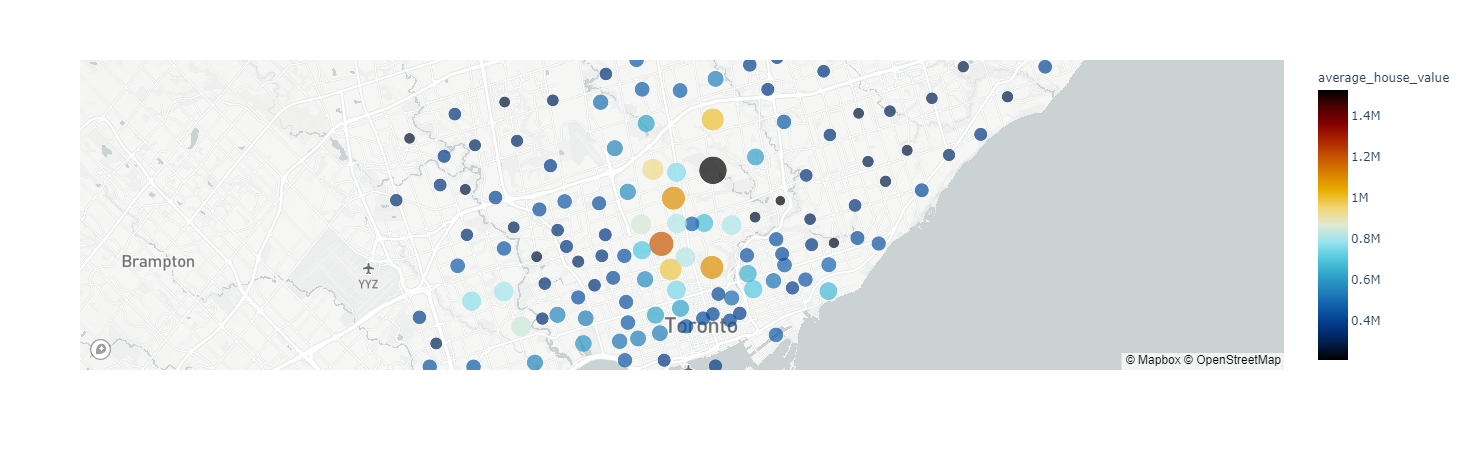

In [27]:

px.set_mapbox_access_token(map_box_api)

location_ngbhood_plot = px.scatter_mapbox(
    location_value_ngbhood,
    lat = "lat",
    lon = "lon",
    color = "average_house_value",
    color_continuous_scale = px.colors.cyclical.IceFire,
    size = "average_house_value",
    zoom = 10)
location_ngbhood_plot.show() 

In [31]:
# Create a scatter mapbox to analyze neighbourhood info

map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

map_ngbhood_house_value = px.scatter_mapbox(
                                     location_value_ngbhood,
                                     lat = "lat",
                                     lon = "lon",
                                     size = "average_house_value",
                                     color = "average_house_value",
                                     zoom = 10)
map_ngbhood_house_value.show() 

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

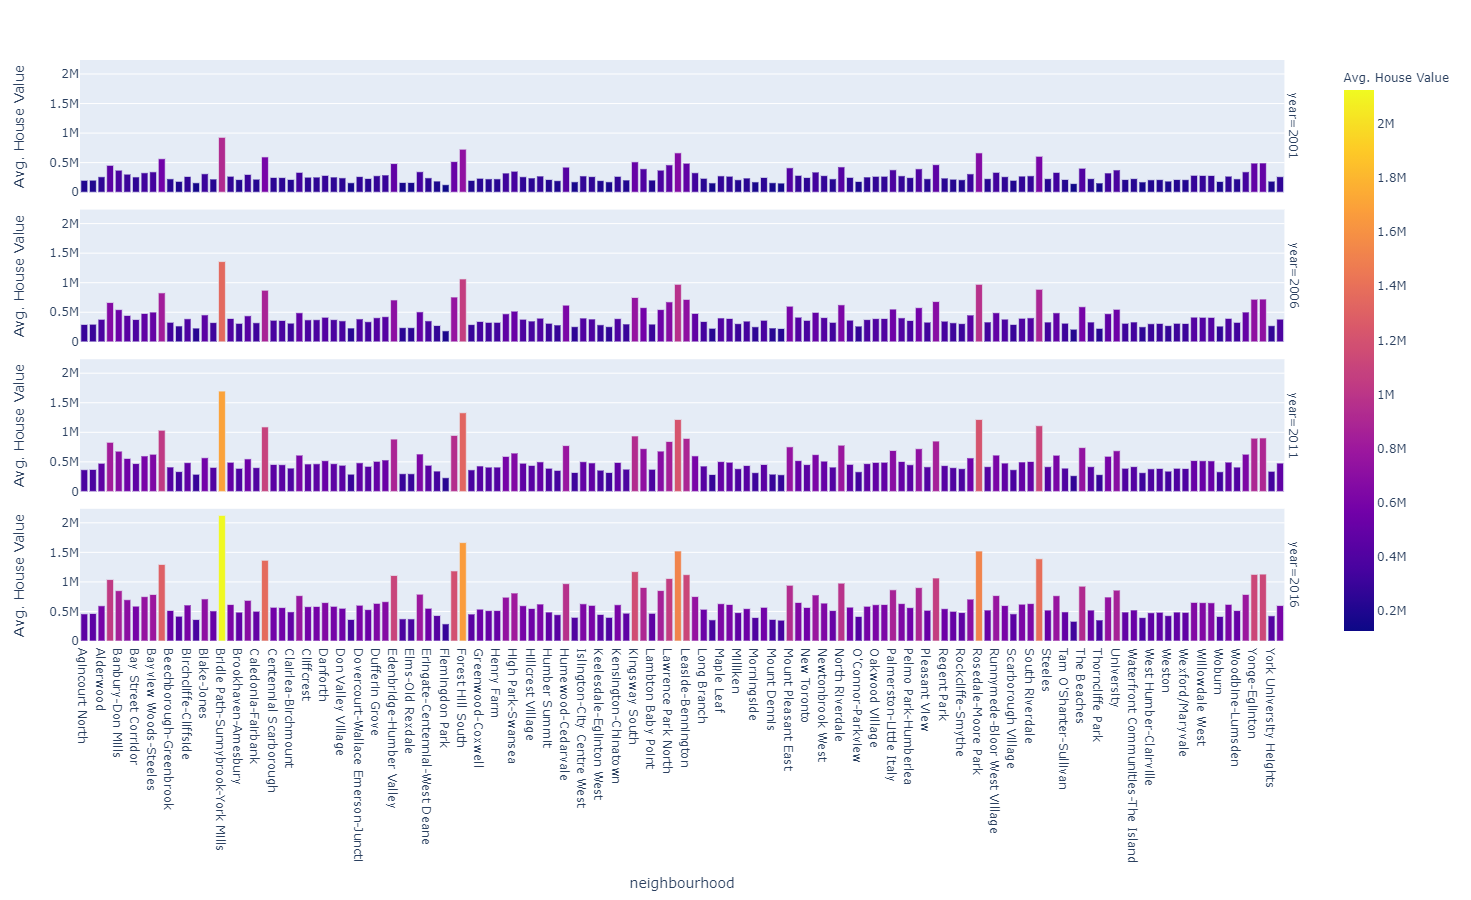

In [28]:
# YOUR CODE HERE!
ngbhood_house_value_reset = ngbhood_house_value.reset_index()

ngbhood_house_value_bar = px.bar(ngbhood_house_value_reset,
                                x="neighbourhood",
                                y="average_house_value",
                                color ="average_house_value",
                                facet_row="year",
                                width=800, height=900,
                                labels={"average_house_value":"Avg. House Value"}
                                )

ngbhood_house_value_bar.show()


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [29]:
cost_living_ngbhood = to_data.filter(["neighbourhood","shelter_costs_owned","shelter_costs_rented"], axis =1)

cost_living_ngbhood



neighbourhood  shelter_costs_owned  \
year                                                           
2001                    Agincourt North                  810   
2001       Agincourt South-Malvern West                  806   
2001                          Alderwood                  817   
2001                              Annex                 1027   
2001                  Banbury-Don Mills                 1007   
2001                     Bathurst Manor                  843   
2001                Bay Street Corridor                 1218   
2001                    Bayview Village                 1197   
2001              Bayview Woods-Steeles                 1212   
2001               Bedford Park-Nortown                  933   
2001            Beechborough-Greenbrook                  622   
2001                            Bendale                  811   
2001              Birchcliffe-Cliffside                  705   
2001                        Black Creek                  703   
2001                        Blake-Jones                  646   
2001               Briar Hill-Belgravia                  810   
2001  Bridle Path-Sunnybrook-York Mills                 1983   
2001                    Broadview North                  781   
2001                Brookhaven-Amesbury                  742   
2001    Cabbagetown-South St.James Town                  810   
2001                 Caledonia-Fairbank                  781   
2001                          Casa Loma                 1241   
2001             Centennial Scarborough                  937   
2001              Church-Yonge Corridor                  942   
2001                Clairlea-Birchmount                  739   
2001                       Clanton Park                  779   
2001                         Cliffcrest                  697   
2001             Corso Italia-Davenport                  785   
2001                           Danforth                  688   
2001                 Danforth-East York                  766   
...                                 ...                  ...   
2016                    South Riverdale                 1928   
2016               St.Andrew-Windfields                 2516   
2016                            Steeles                 1422   
2016                Stonegate-Queensway                 1683   
2016             Tam O'Shanter-Sullivan                 1408   
2016                      Taylor-Massey                 1473   
2016                        The Beaches                 2284   
2016       Thistletown-Beaumond Heights                 1571   
2016                   Thorncliffe Park                 1689   
2016                  Trinity-Bellwoods                 1773   
2016                         University                 1850   
2016                   Victoria Village                 1529   
2016  Waterfront Communities-The Island                 2119   
2016                          West Hill                 1446   
2016             West Humber-Clairville                 1586   
2016                Westminster-Branson                 1700   
2016                             Weston                 1568   
2016                 Weston-Pellam Park                 1558   
2016                   Wexford/Maryvale                 1408   
2016                    Willowdale East                 1841   
2016                    Willowdale West                 1771   
2016   Willowridge-Martingrove-Richview                 1476   
2016                             Woburn                 1459   
2016                  Woodbine Corridor                 1916   
2016                   Woodbine-Lumsden                 1689   
2016                           Wychwood                 1864   
2016                     Yonge-Eglinton                 2398   
2016                     Yonge-St.Clair                 2192   
2016            York University Heights                 1444   
2016                 Yorkdale-Glen Park                 14

In [30]:
list_top_ngbhood = top_10_ngbhood.reset_index()

list_top_ngbhood=list_top_ngbhood["neighbourhood"].tolist()
list_top_ngbhood

['Bridle Path-Sunnybrook-York Mills',
 'Forest Hill South',
 'Lawrence Park South',
 'Rosedale-Moore Park',
 'St.Andrew-Windfields',
 'Casa Loma',
 'Bedford Park-Nortown',
 'Forest Hill North',
 'Kingsway South',
 'Yonge-St.Clair']

In [31]:
top_living_ngbhood = cost_living_ngbhood.query("neighbourhood in @list_top_ngbhood")
top_living_ngbhood

neighbourhood  shelter_costs_owned  \
year                                                           
2001               Bedford Park-Nortown                  933   
2001  Bridle Path-Sunnybrook-York Mills                 1983   
2001                          Casa Loma                 1241   
2001                  Forest Hill North                  940   
2001                  Forest Hill South                 1001   
2001                     Kingsway South                 1362   
2001                Lawrence Park South                 1021   
2001                Rosedale-Moore Park                 1219   
2001               St.Andrew-Windfields                 1055   
2001                     Yonge-St.Clair                 1091   
2006               Bedford Park-Nortown                 1808   
2006  Bridle Path-Sunnybrook-York Mills                 2170   
2006                          Casa Loma                 1819   
2006                  Forest Hill North                 1731   
2006                  Forest Hill South                 1781   
2006                     Kingsway South                 1625   
2006                Lawrence Park South                 1977   
2006                Rosedale-Moore Park                 1868   
2006               St.Andrew-Windfields                 1881   
2006                     Yonge-St.Clair                 1638   
2011               Bedford Park-Nortown                 1988   
2011  Bridle Path-Sunnybrook-York Mills                 2387   
2011                          Casa Loma                 2001   
2011                  Forest Hill North                 1904   
2011                  Forest Hill South                 1959   
2011                     Kingsway South                 1787   
2011                Lawrence Park South                 2174   
2011                Rosedale-Moore Park                 2054   
2011               St.Andrew-Windfields                 2069   
2011                     Yonge-St.Clair                 1802   
2016               Bedford Park-Nortown                 2418   
2016  Bridle Path-Sunnybrook-York Mills                 2903   
2016                          Casa Loma                 2434   
2016                  Forest Hill North                 2316   
2016                  Forest Hill South                 2383   
2016                     Kingsway South                 2173   
2016                Lawrence Park South                 2644   
2016                Rosedale-Moore Park                 2498   
2016               St.Andrew-Windfields                 2516   
2016                     Yonge-St.Clair                 2192   

      shelter_costs_rented  
year                        
2001                  1491  
2001                  1790  
2001                  1500  
2001                  1428  
2001                  1469  
2001                  1340  
2001                  1630  
2001                  1540  
2001                  1551  
2001                  1351  
2006                  1020  
2006                  2167  
2006                  1356  
2006                  1027  
2006                  1094  
2006                  1488  
2006                  1116  
2006                  1332  
2006                  1152  
2006                  1192  
2011                  1124  
2011                  2388  
2011                  1494  
2011                  1132  
2011                  1206  
2011                  1640  
2011                  1230  
2011                  1468  
2011                  1270  
2011                  1314  
2016                  1385  
2016                  2942  
2016                  1841  
2016                  1395  
2016                  1486  
2016                  2020  
2016                  1515  
2016                  1809  
2016                  1565  
2016                  1619

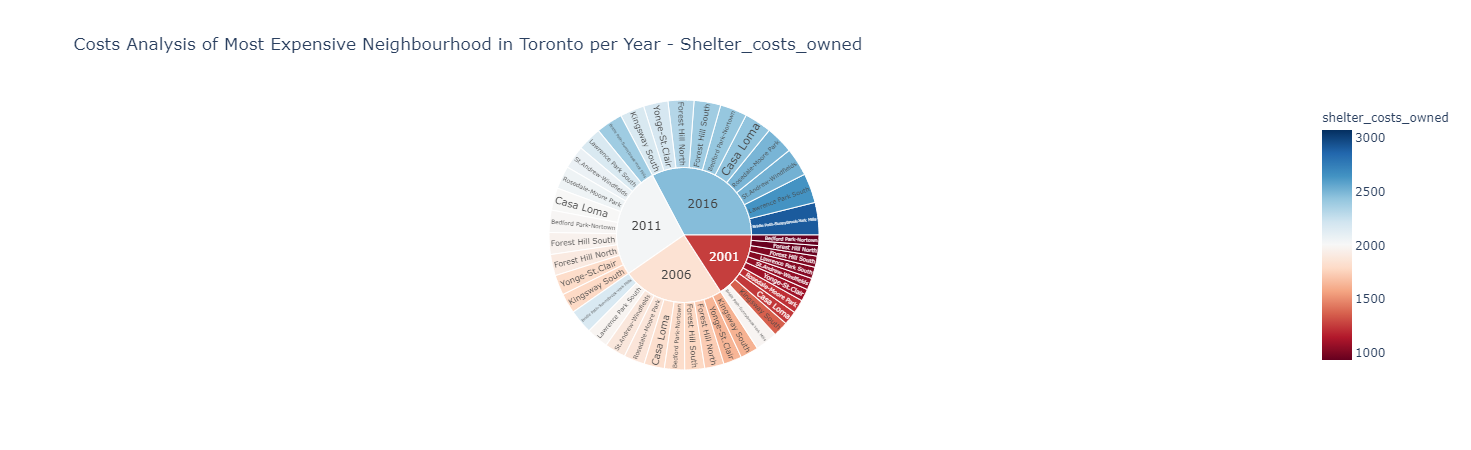

In [32]:
# Create the sunburst chart
fig = px.sunburst(top_living_ngbhood, path=[top_living_ngbhood.index,"neighbourhood"], values="shelter_costs_owned",
                  color="shelter_costs_owned", hover_data=["shelter_costs_owned"],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(top_living_ngbhood["shelter_costs_owned"], weights=top_living_ngbhood["shelter_costs_owned"]),
                  title = "Costs Analysis of Most Expensive Neighbourhood in Toronto per Year - Shelter_costs_owned")
fig.show()

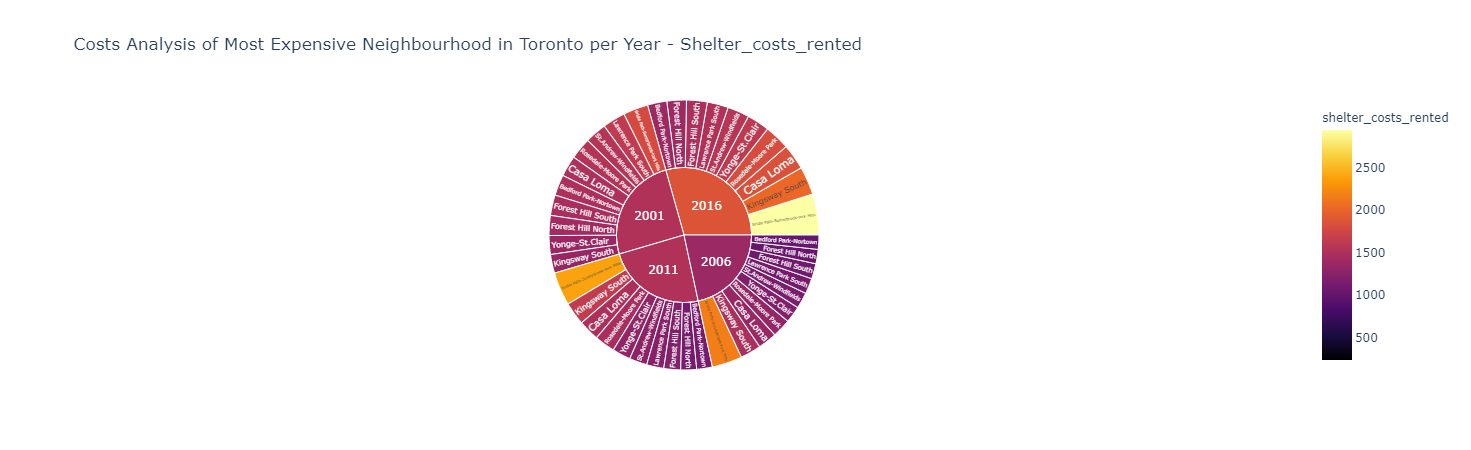

In [33]:
fig_2 = px.sunburst(top_living_ngbhood, path=[top_living_ngbhood.index, "neighbourhood"], values="shelter_costs_rented",
                  color="shelter_costs_rented", hover_data=["shelter_costs_rented"],
                  color_continuous_scale='InFerno',
                  color_continuous_midpoint=np.average(top_living_ngbhood["shelter_costs_rented"], weights=top_living_ngbhood["shelter_costs_rented"]),
                  title = "Costs Analysis of Most Expensive Neighbourhood in Toronto per Year - Shelter_costs_rented")
fig_2.show()